In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('./ds_salaries.csv')
df

work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0       80000             EUR          85847                 ES           100   
1       30000             USD          30000                 US           100   
2       25500             USD          25500                 US           100   
3      175000             USD         175000                 CA           100   
4      120000             USD         120000                 CA           100   
...       ...             ...            ...                ...           ...   
3750   412000             USD         412000                 US           100   
3751   151000             USD         151000                 US           100   
3752   105000             USD         105000                 US           100   
3753   100000             USD         100000                 US           100   
3754  7000000             INR          94665                 IN            50   

     company_location company_size  
0                  ES            L  
1                  US            S  
2                  US            S  
3                  CA            M  
4                  CA            M  
...               ...          ...  
3750               US            L  
3751               US            L  
3752               US            S  
3753               US            L  
3754               IN            L  

[3755 rows x 11 columns]

In [3]:
df['experience_level'] = df['experience_level'].replace('SE','Expert')
df['experience_level'] = df['experience_level'].replace('MI','Intermediate')
df['experience_level'] = df['experience_level'].replace('EN','Entry-level')
df['experience_level'] = df['experience_level'].replace('EX','Director')

In [4]:
df['employment_type'] = df['employment_type'].replace('FT','Full Time')
df['employment_type'] = df['employment_type'].replace('PT','Part Time')
df['employment_type'] = df['employment_type'].replace('CT','Contract')
df['employment_type'] = df['employment_type'].replace('FL','Freelance')

In [5]:
df

work_year experience_level employment_type                 job_title  \
0          2023           Expert       Full Time  Principal Data Scientist   
1          2023     Intermediate        Contract               ML Engineer   
2          2023     Intermediate        Contract               ML Engineer   
3          2023           Expert       Full Time            Data Scientist   
4          2023           Expert       Full Time            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020           Expert       Full Time            Data Scientist   
3751       2021     Intermediate       Full Time  Principal Data Scientist   
3752       2020      Entry-level       Full Time            Data Scientist   
3753       2020      Entry-level        Contract     Business Data Analyst   
3754       2021           Expert       Full Time      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0       80000             EUR          85847                 ES           100   
1       30000             USD          30000                 US           100   
2       25500             USD          25500                 US           100   
3      175000             USD         175000                 CA           100   
4      120000             USD         120000                 CA           100   
...       ...             ...            ...                ...           ...   
3750   412000             USD         412000                 US           100   
3751   151000             USD         151000                 US           100   
3752   105000             USD         105000                 US           100   
3753   100000             USD         100000                 US           100   
3754  7000000             INR          94665                 IN            50   

     company_location company_size  
0                  ES            L  
1                  US            S  
2                  US            S  
3                  CA            M  
4                  CA            M  
...               ...          ...  
3750               US            L  
3751               US            L  
3752               US            S  
3753               US            L  
3754               IN            L  

[3755 rows x 11 columns]

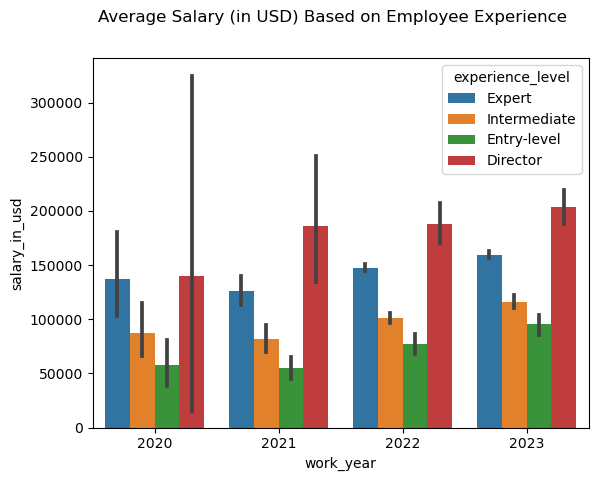

In [6]:
plt.suptitle('Average Salary (in USD) Based on Employee Experience')
fig = sns.barplot(data = df,x = 'work_year',y = 'salary_in_usd',hue = 'experience_level',)
sns.move_legend(fig,'upper right')
plt.show()

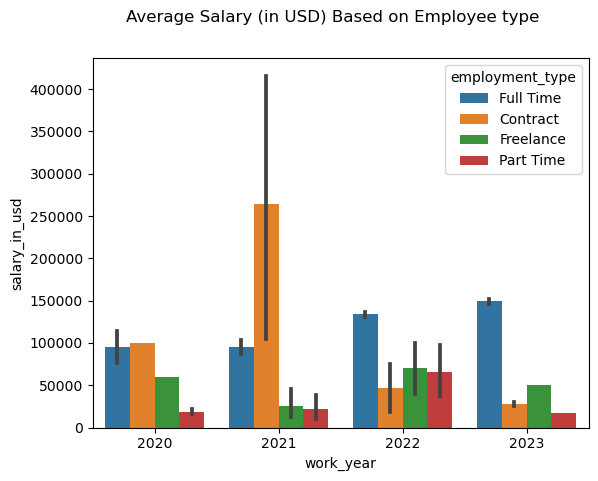

In [7]:
plt.suptitle('Average Salary (in USD) Based on Employee type')
fig = sns.barplot(data = df,x = 'work_year',y = 'salary_in_usd',hue = 'employment_type')
sns.move_legend(fig,'upper right')
plt.show()

### Conclusion : Above Graph is showing that as Experiene inccreases Salary is also increases

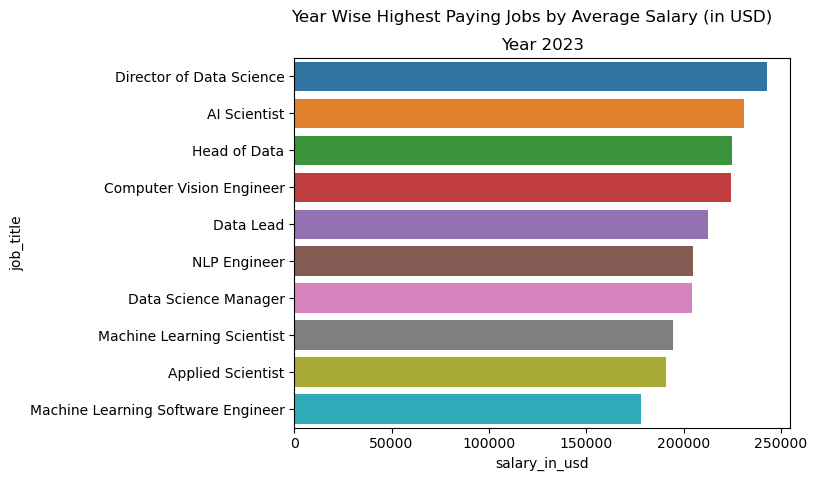

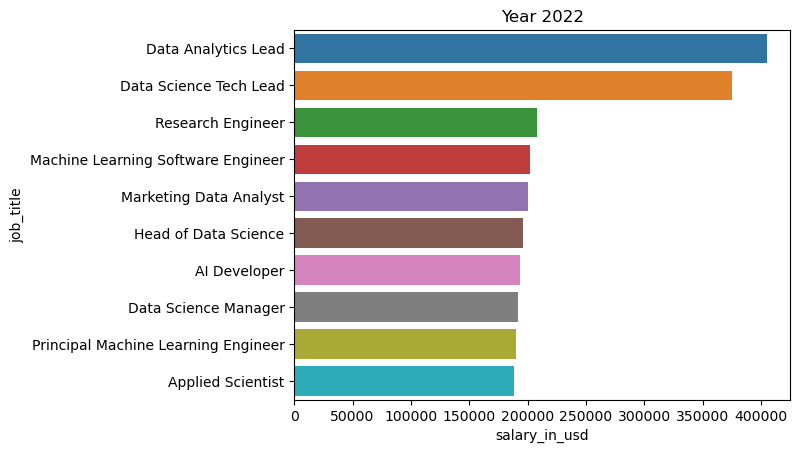

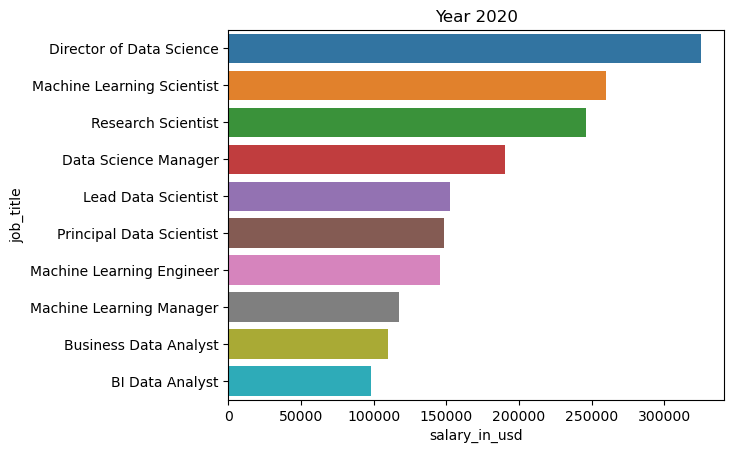

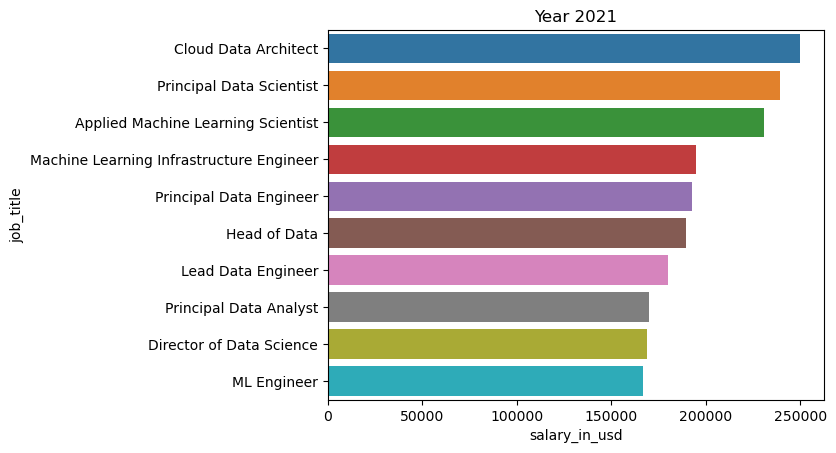

In [8]:
plt.suptitle('Year Wise Highest Paying Jobs by Average Salary (in USD) ')
for i in df['work_year'].unique():
    data = df[df['work_year'] == i]
    new_data = data.groupby(by =['job_title']).mean().sort_values(ascending=False,by = 'salary_in_usd').reset_index().head(10)
    plt.title(f'Year {i}')
    sns.barplot(data = new_data,y = 'job_title',x = 'salary_in_usd')
    plt.show()
    

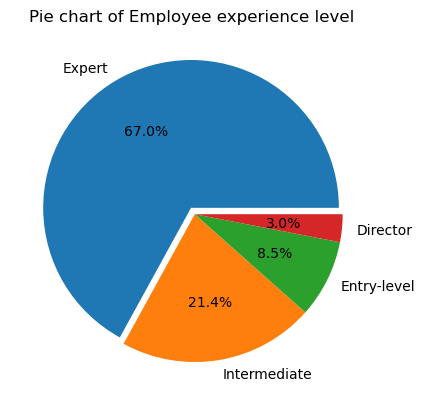

In [9]:
data = df.experience_level.value_counts(normalize = True)*100
label = ['Expert','Intermediate','Entry-level','Director']
explodes = [0.05,0,0,0]
plt.title('Pie chart of Employee experience level ')
plt.pie(data,labels=label,autopct='%0.1f%%',explode = explodes)
plt.show()

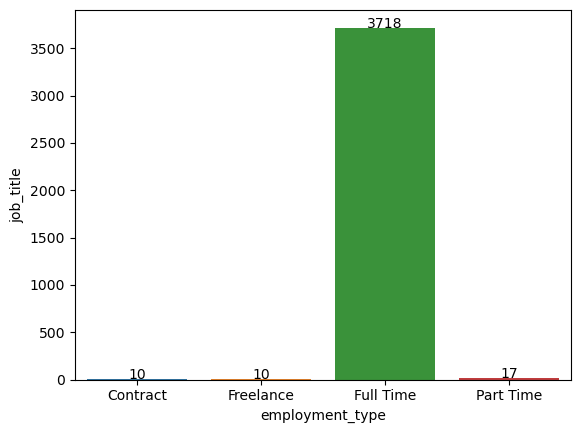

In [10]:
data = df.groupby(by = ['employment_type']).count().reset_index()
sns.barplot(data = data,x = 'employment_type',y = 'job_title' )
for i in range(len(data.employment_type)):
    plt.text(i,data.job_title[i],str(data.job_title[i]),ha = 'center')
plt.show()

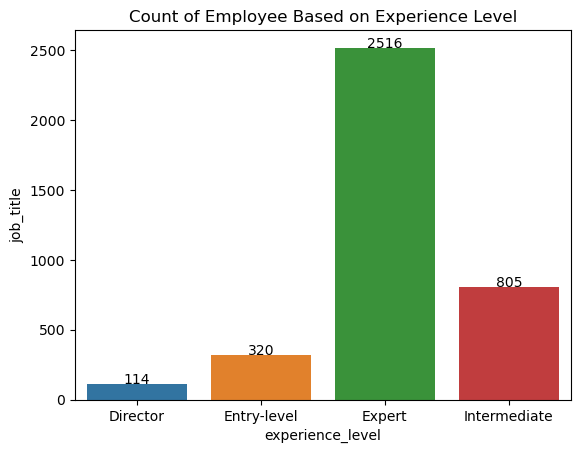

In [34]:
data = df.groupby(by = ['experience_level']).count().reset_index()
sns.barplot(data = data,x = 'experience_level',y = 'job_title' )
for i in range(len(data.employment_type)):
    plt.text(i,data.job_title[i],str(data.job_title[i]),ha = 'center')
plt.title('Count of Employee Based on Experience Level')
plt.show()

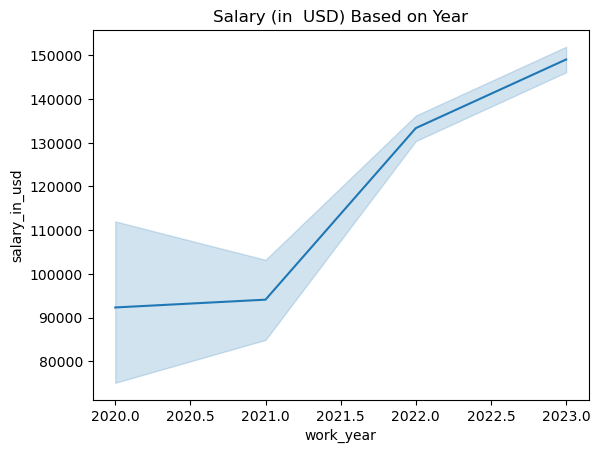

In [12]:
sns.lineplot(data = df,x = 'work_year',y = 'salary_in_usd')
plt.title('Salary (in  USD) Based on Year')
plt.show()

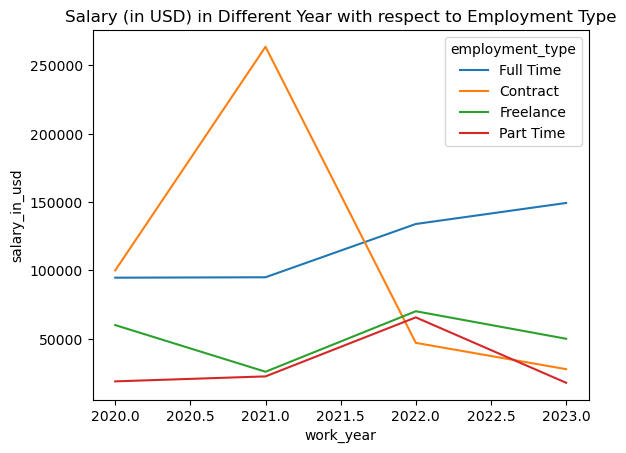

In [13]:
sns.lineplot(data = df,x = 'work_year',y = 'salary_in_usd',hue = 'employment_type',err_style=None)
plt.title('Salary (in USD) in Different Year with respect to Employment Type')
plt.show()

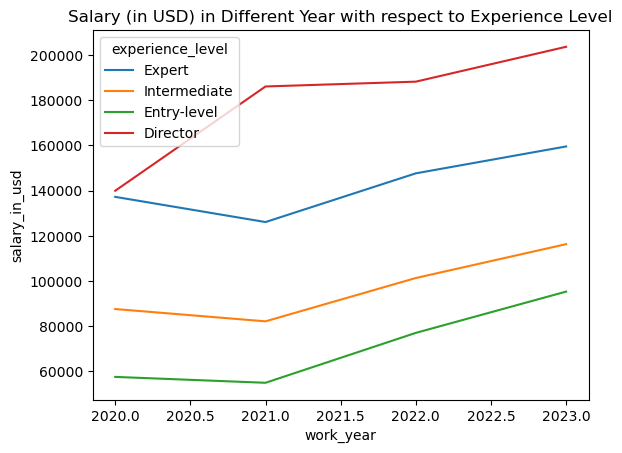

In [14]:
sns.lineplot(data = df,x = 'work_year',y = 'salary_in_usd',hue = 'experience_level',err_style=None)
plt.title('Salary (in USD) in Different Year with respect to Experience Level')
plt.show()

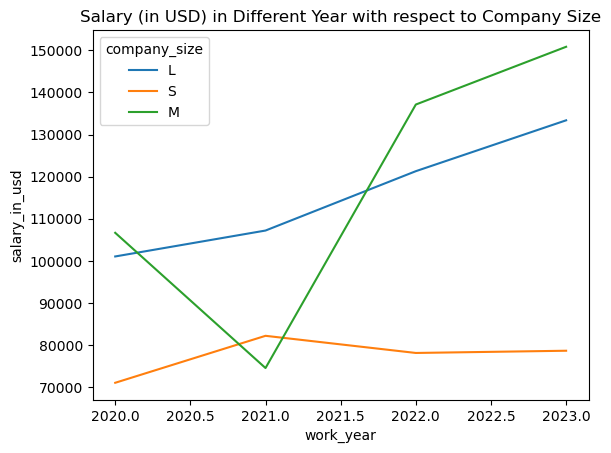

In [15]:
sns.lineplot(data = df,x = 'work_year',y = 'salary_in_usd',hue = 'company_size',err_style=None)
plt.title('Salary (in USD) in Different Year with respect to Company Size')
plt.show()

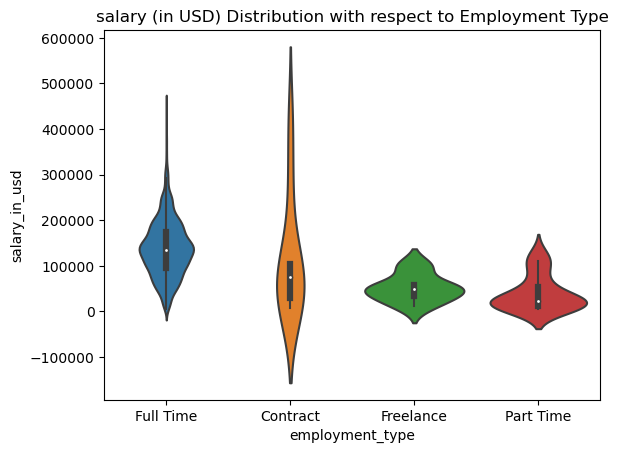

In [16]:
sns.violinplot(data = df,x = 'employment_type',y = 'salary_in_usd')
plt.title('salary (in USD) Distribution with respect to Employment Type')
plt.show()

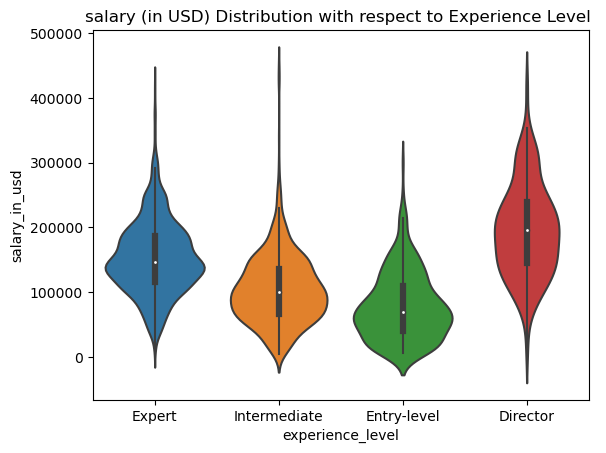

In [17]:
sns.violinplot(data = df,x = 'experience_level',y = 'salary_in_usd')
plt.title('salary (in USD) Distribution with respect to Experience Level ')
plt.show()

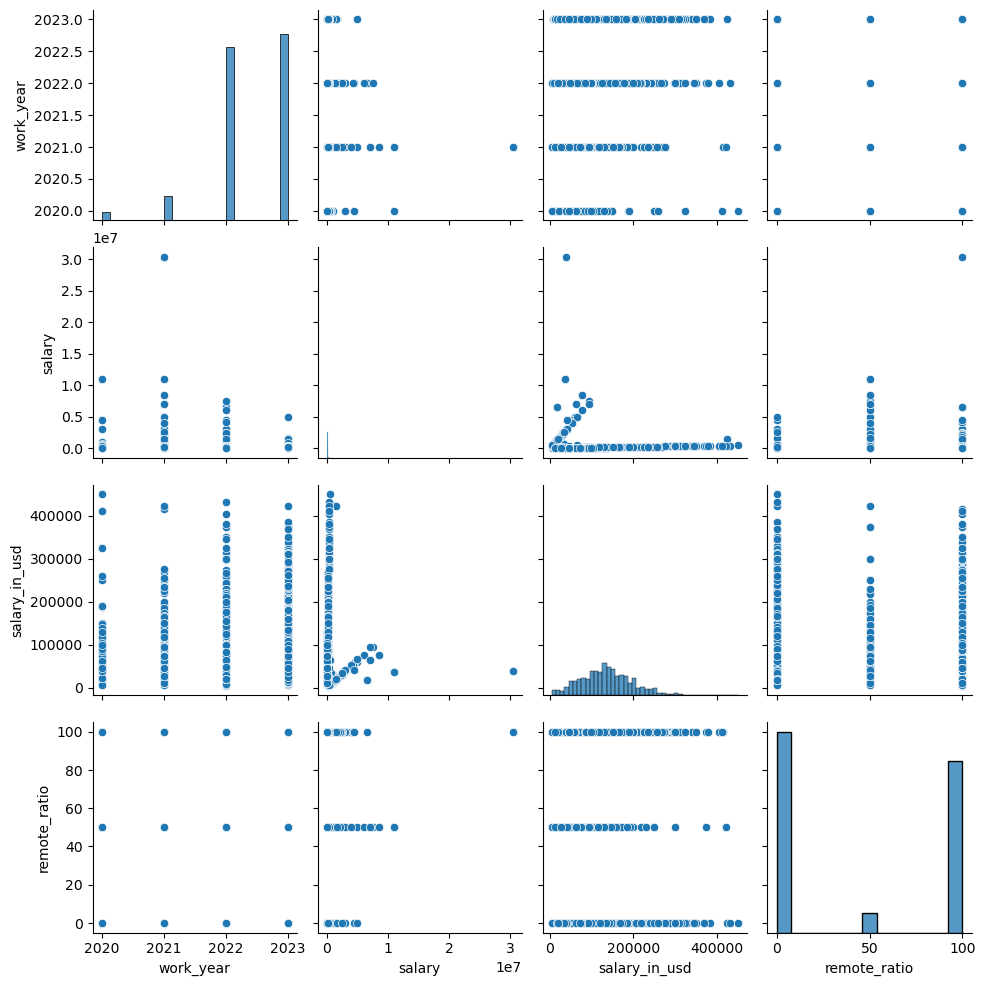

In [18]:
sns.pairplot(df)
plt.show()

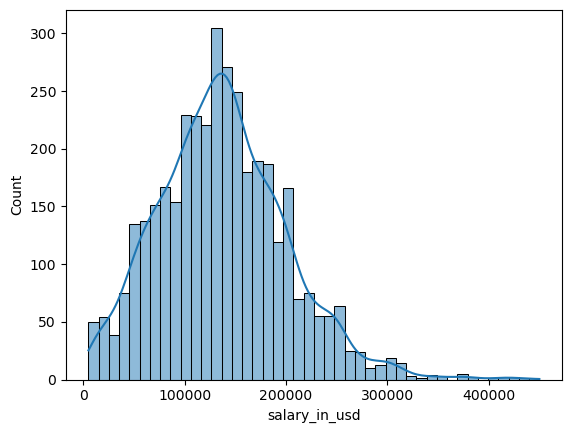

In [19]:
sns.histplot(data = df,x = 'salary_in_usd',kde = True)
plt.title('Distribution Of Salary')
plt.show()

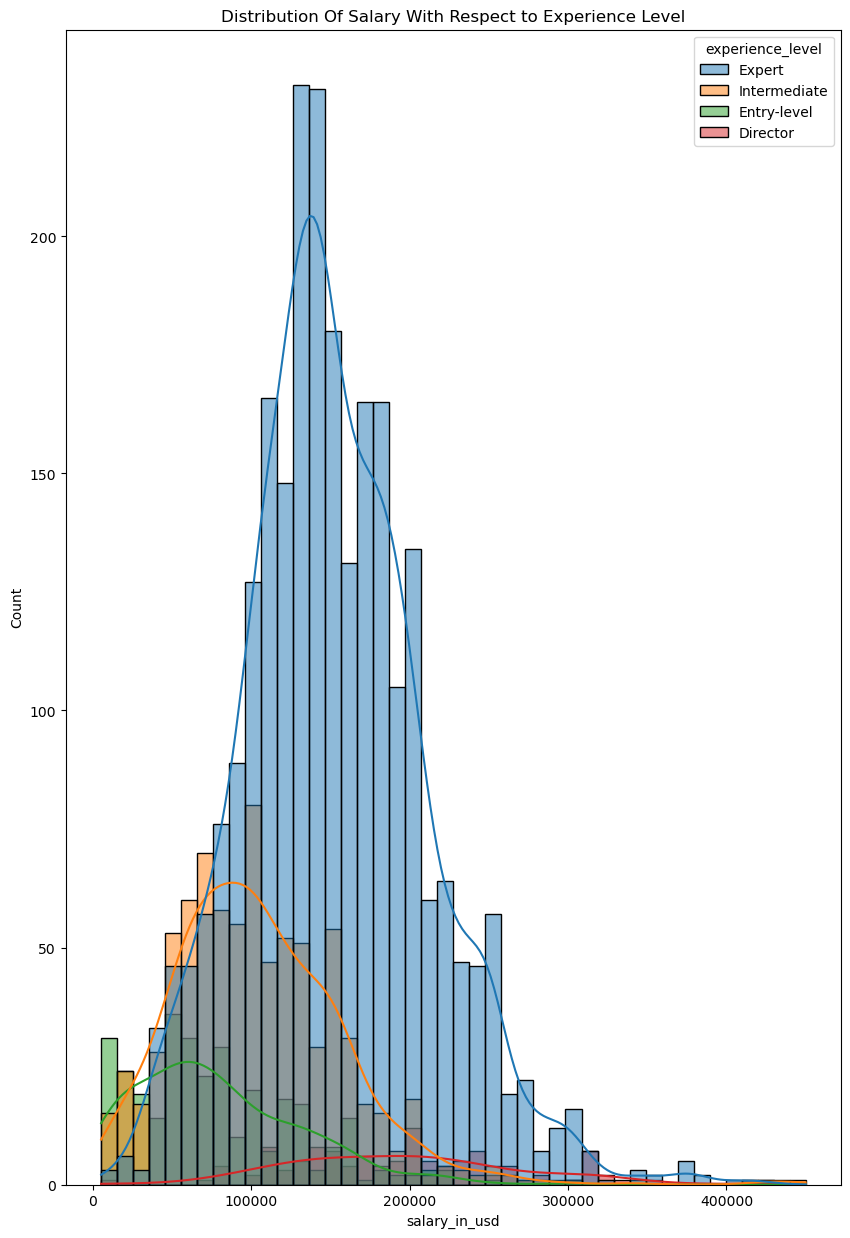

In [35]:
plt.figure(figsize = [10,15])
sns.histplot(data = df,x = 'salary_in_usd',kde = True,hue = 'experience_level')
plt.title('Distribution Of Salary With Respect to Experience Level')
plt.show()

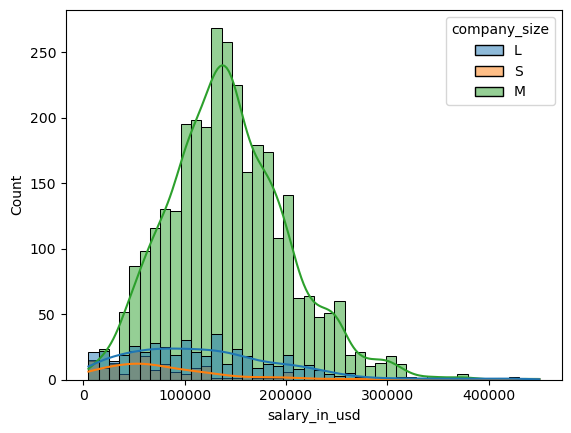

In [21]:
sns.histplot(data = df,x = 'salary_in_usd',kde = True,hue = 'company_size')
plt.title('Distribution Of Salary With Respect to Company Size')
plt.show()

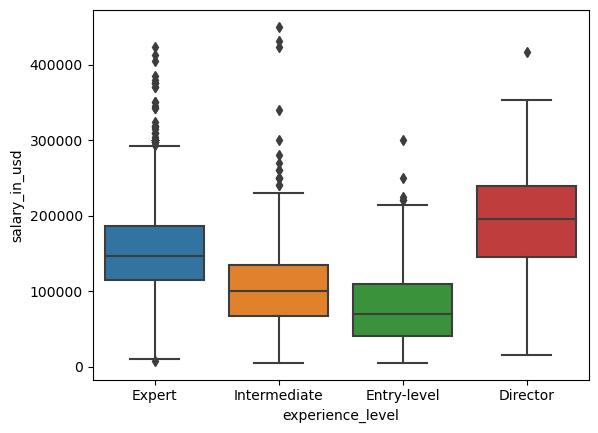

In [22]:
sns.boxplot(data = df,x = 'experience_level',y = 'salary_in_usd')
plt.show()

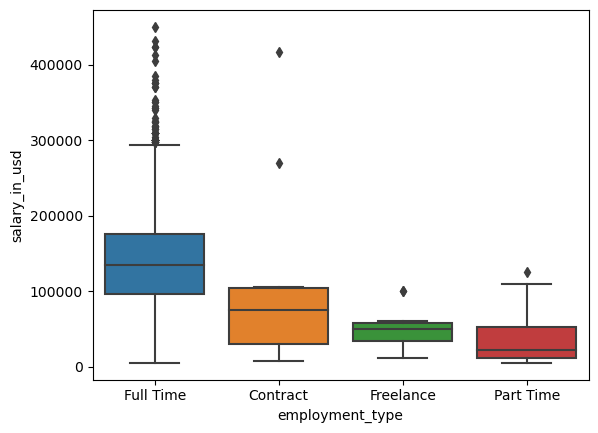

In [23]:
sns.boxplot(data = df,x = 'employment_type',y = 'salary_in_usd')
plt.show()

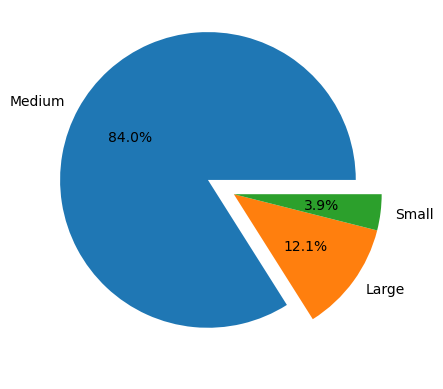

In [24]:
data = df['company_size'].value_counts(normalize = True)*100
data
label = ['Medium','Large','Small']
myexplode = [0.2,0,0]
plt.pie(data,labels=label,autopct = '%0.1f%%',explode = myexplode)
plt.show()

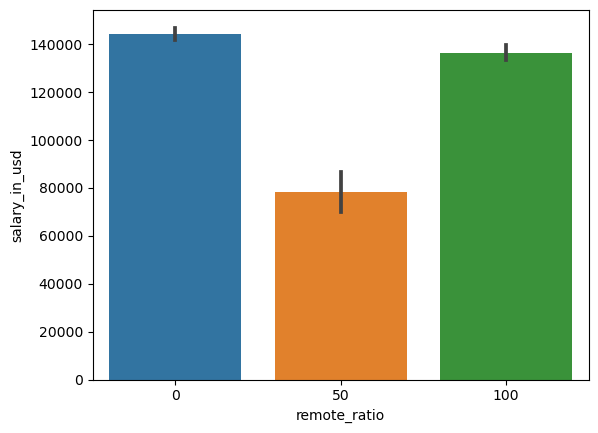

In [25]:
sns.barplot(data = df,x = 'remote_ratio',y = 'salary_in_usd')
plt.show()

In [26]:
df['company_location'] = df['company_location'].str.strip()

In [27]:
df

work_year experience_level employment_type                 job_title  \
0          2023           Expert       Full Time  Principal Data Scientist   
1          2023     Intermediate        Contract               ML Engineer   
2          2023     Intermediate        Contract               ML Engineer   
3          2023           Expert       Full Time            Data Scientist   
4          2023           Expert       Full Time            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020           Expert       Full Time            Data Scientist   
3751       2021     Intermediate       Full Time  Principal Data Scientist   
3752       2020      Entry-level       Full Time            Data Scientist   
3753       2020      Entry-level        Contract     Business Data Analyst   
3754       2021           Expert       Full Time      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0       80000             EUR          85847                 ES           100   
1       30000             USD          30000                 US           100   
2       25500             USD          25500                 US           100   
3      175000             USD         175000                 CA           100   
4      120000             USD         120000                 CA           100   
...       ...             ...            ...                ...           ...   
3750   412000             USD         412000                 US           100   
3751   151000             USD         151000                 US           100   
3752   105000             USD         105000                 US           100   
3753   100000             USD         100000                 US           100   
3754  7000000             INR          94665                 IN            50   

     company_location company_size  
0                  ES            L  
1                  US            S  
2                  US            S  
3                  CA            M  
4                  CA            M  
...               ...          ...  
3750               US            L  
3751               US            L  
3752               US            S  
3753               US            L  
3754               IN            L  

[3755 rows x 11 columns]

In [28]:
import pycountry

# create a dictionary mapping ISO-2 to ISO-3 codes
iso2_to_iso3 = {country.alpha_2: country.alpha_3 for country in pycountry.countries}

# create a new column with ISO-3 codes based on the ISO-2 column
df['company_location_iso3'] = df['company_location'].map(iso2_to_iso3)
df['employee_residence_iso3'] = df['employee_residence'].map(iso2_to_iso3)

In [29]:
df

work_year experience_level employment_type                 job_title  \
0          2023           Expert       Full Time  Principal Data Scientist   
1          2023     Intermediate        Contract               ML Engineer   
2          2023     Intermediate        Contract               ML Engineer   
3          2023           Expert       Full Time            Data Scientist   
4          2023           Expert       Full Time            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020           Expert       Full Time            Data Scientist   
3751       2021     Intermediate       Full Time  Principal Data Scientist   
3752       2020      Entry-level       Full Time            Data Scientist   
3753       2020      Entry-level        Contract     Business Data Analyst   
3754       2021           Expert       Full Time      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0       80000             EUR          85847                 ES           100   
1       30000             USD          30000                 US           100   
2       25500             USD          25500                 US           100   
3      175000             USD         175000                 CA           100   
4      120000             USD         120000                 CA           100   
...       ...             ...            ...                ...           ...   
3750   412000             USD         412000                 US           100   
3751   151000             USD         151000                 US           100   
3752   105000             USD         105000                 US           100   
3753   100000             USD         100000                 US           100   
3754  7000000             INR          94665                 IN            50   

     company_location company_size company_location_iso3  \
0                  ES            L                   ESP   
1                  US            S                   USA   
2                  US            S                   USA   
3                  CA            M                   CAN   
4                  CA            M                   CAN   
...               ...          ...                   ...   
3750               US            L                   USA   
3751               US            L                   USA   
3752               US            S                   USA   
3753               US            L                   USA   
3754               IN            L                   IND   

     employee_residence_iso3  
0                        ESP  
1                        USA  
2                        USA  
3                        CAN  
4                        CAN  
...                      ...  
3750                     USA  
3751                     USA  
3752                     USA  
3753                     USA  
3754                     IND  

[3755 rows x 13 columns]

In [30]:
fig = px.choropleth(df,locations='company_location_iso3',locationmode='ISO-3',color = 'salary_in_usd',scope = 'world',color_continuous_scale='Reds',title = 'Company Location With Respect to Salary')

In [31]:
fig.show()


In [32]:
fig = px.choropleth(df,locations='company_location_iso3',locationmode='ISO-3',color = 'salary_in_usd',scope = 'world',color_continuous_scale='Reds',title = 'Company Location With Respect to Salary',animation_frame='work_year')
fig.show()

In [33]:
fig = px.choropleth(df,locations='employee_residence_iso3',locationmode='ISO-3',color = 'salary_in_usd',scope = 'world',color_continuous_scale='Reds',title = 'Employee Residence With Respect to Salary')
fig.show()

In [36]:
fig = px.choropleth(df,locations='employee_residence_iso3',locationmode='ISO-3',color = 'remote_ratio',scope = 'world',color_continuous_scale='Reds',title = 'Employee Residence With Respect to Salary')
fig.show()